In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import torch
from torch import optim, nn
from math import exp

import numpy as np

from tqdm import tqdm
from random import randint

from load_dataset import load_dataset, plot_image, save_image
from auto_encoder2 import PAutoE

device = "cuda"

pimages = load_dataset().to(device)

In [2]:
T = 100
beta = torch.linspace(10e-4, 0.05, T)

alpha = 1 - beta

alpha_ = torch.zeros(T)

for i in range(T):
    alpha_[i] = torch.prod(alpha[0:i])

alpha_

tensor([1.0000, 0.9990, 0.9975, 0.9955, 0.9930, 0.9901, 0.9866, 0.9827, 0.9783,
        0.9735, 0.9682, 0.9624, 0.9562, 0.9496, 0.9425, 0.9351, 0.9272, 0.9189,
        0.9103, 0.9012, 0.8919, 0.8821, 0.8721, 0.8617, 0.8510, 0.8401, 0.8289,
        0.8174, 0.8056, 0.7936, 0.7815, 0.7691, 0.7565, 0.7438, 0.7309, 0.7178,
        0.7047, 0.6914, 0.6781, 0.6646, 0.6512, 0.6376, 0.6240, 0.6104, 0.5968,
        0.5832, 0.5697, 0.5561, 0.5426, 0.5292, 0.5158, 0.5026, 0.4894, 0.4763,
        0.4633, 0.4505, 0.4378, 0.4252, 0.4128, 0.4005, 0.3884, 0.3765, 0.3647,
        0.3532, 0.3418, 0.3306, 0.3197, 0.3089, 0.2984, 0.2880, 0.2779, 0.2680,
        0.2583, 0.2488, 0.2396, 0.2306, 0.2218, 0.2132, 0.2049, 0.1968, 0.1889,
        0.1812, 0.1738, 0.1665, 0.1595, 0.1527, 0.1462, 0.1398, 0.1336, 0.1277,
        0.1219, 0.1164, 0.1110, 0.1059, 0.1009, 0.0961, 0.0915, 0.0870, 0.0828,
        0.0787])

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


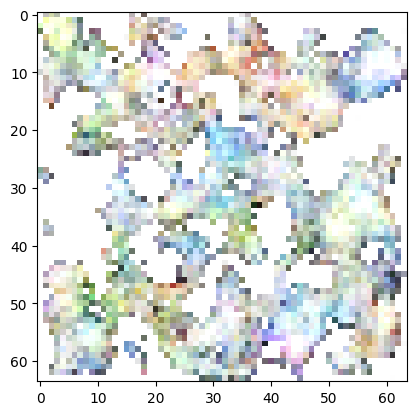

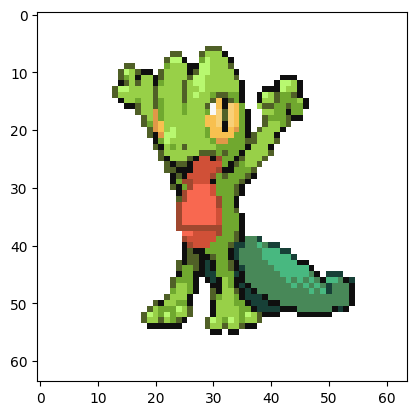

In [14]:
tt = 100

z = torch.randn((4,64,64), device=device)
x = z

for t in reversed(range(tt)):
    
    print(t)

    if (t == 0):
        break

    model = torch.jit.load(f"./model_{t}.pt").eval().to(device)
    
    z = torch.randn((4,64,64), device=device) * torch.sqrt(beta[t])
    
    e = model(x[None])[0] * (1 - alpha[t]) / torch.sqrt(1 - alpha_[t])
    x = (1 / torch.sqrt(alpha[t])) * (x - e) + z

plot_image(x)
plot_image(pimages[0][251])
save_image(x, "tests/test13/7.png")